# The Spark Foundation-GRIP AUGUST 2021

### Name: Piyush M. Kurkute
### Data Science and Business Analytics Intern
### Task 1: Prediction using Supervised ML

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
# reading data from url
url = "http://bit.ly/w-data"
df = pd.read_csv(url, index_col=False)

In [4]:
# get information of data like total rows, columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
# get stat info
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Actual Data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Pairwise relationships

'Hours' and 'Scores' are highly correlated.

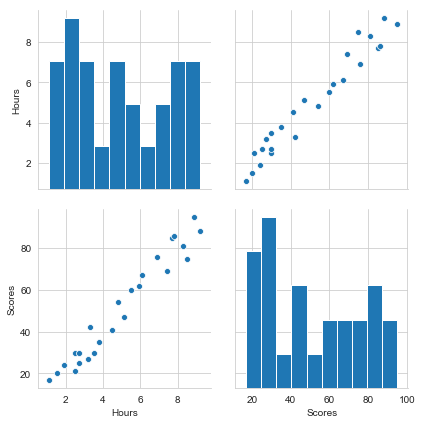

In [7]:
sns.pairplot(df, height=3)

## Checking Outliers if any

1. An outlier is a data point that differs significantly from other observations.
2. An outlier can cause serious problems in statistical analyses.
3. An observation is an outlier if it falls more than above the "upper quartile" or more than below the "lower quartile".

=>
There are no outliers.

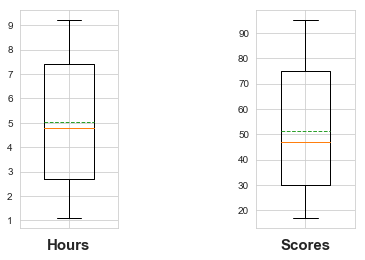

In [39]:
plt.subplot(1,3,1)
plt.boxplot(df['Hours'], sym='r', meanline=True, showmeans=True, widths=0.5, labels=[''])
plt.xlabel('Hours', fontsize=15, fontweight='bold')

plt.subplot(1,3,3)
plt.boxplot(df['Scores'], sym='r', meanline=True, showmeans=True, widths=0.5, labels=[''])
plt.xlabel('Scores', fontsize=15, fontweight='bold')
plt.show()

## Splitting Data

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---------------------')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (20, 1)
y_train:  (20,)
---------------------
X_test:  (5, 1)
y_test:  (5,)


## Training Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Plotting regression line

Equation: y = mx+b (
        m = slope of the line, 
        x = independent variable, 
        b = y_intercept )

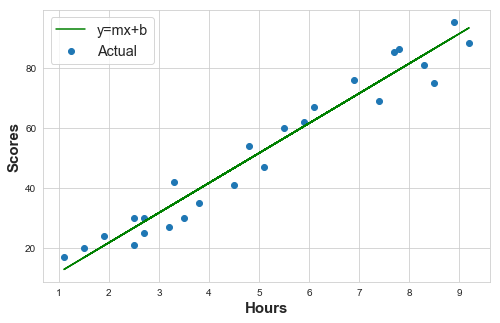

In [41]:
line = model.coef_ * X + model.intercept_

plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Actual')
plt.plot(X, line, color='g', label='y=mx+b')
plt.xlabel('Hours', fontsize=15, fontweight='bold')
plt.ylabel('Scores', fontsize=15, fontweight='bold')
plt.legend(fontsize='x-large')
plt.show()

## Prediction

In [17]:
y_pred = model.predict(X_test)

In [18]:
pred_df = pd.DataFrame(data={'Actual Score': y_test, 'Predicted Score': y_pred, 'Difference':(y_test-y_pred)})
pred_df

,Actual Score,Predicted Score,Difference
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


## Visualize Actual and Predicted data

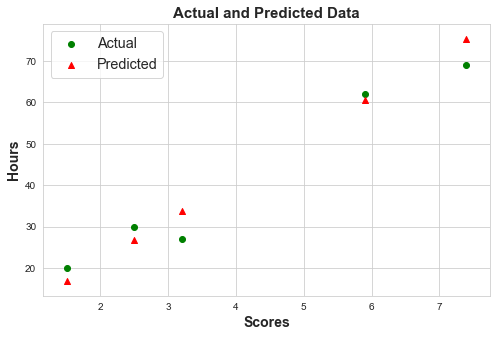

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='g', label='Actual')
plt.scatter(X_test, y_pred, color='r', marker='^', label='Predicted')
plt.title('Actual and Predicted Data', fontsize=15, fontweight='bold')
plt.xlabel('Scores', fontsize=14, fontweight='bold')
plt.ylabel('Hours', fontsize=14, fontweight='bold')
plt.legend(fontsize='x-large')
plt.show()

## Predicting with our custom values

In [59]:
hours = float(input("Enter study hours: "))
pred_score = model.predict(hours)[0]
print('Predicted score: ', round(pred_score, 2))

Enter study hours: 9.25
Predicted score:  93.69


## Evaluating model performance

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# Returns the coefficient of determination R^2 of the prediction.

print('Training score: ', model.score(X_train,y_train))
print('Testing score: ', model.score(X_test,y_test))

Training score:  0.9515510725211553
Testing score:  0.9454906892105356


In [23]:
print('Mean absolute error: ', mean_absolute_error(y_test,y_pred))
print('Mean squared error: ', mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error:  4.183859899002975
Mean squared error:  21.5987693072174
RMSE:  4.6474476121003665


## Conclusion:  Our model performs well